In [12]:
#Dependicies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import os

In [13]:
# File to Load (Remember to Change These)
#maang_data = Path("resources/Maang stock prices/combined_file.csv")
#doge_data = Path("resources/DOGE-USD.csv")
#btc_data = Path("resources/BTC-USD.csv")

# Read School and Student Data File and store into Pandas DataFrames
#maang_data_path = pd.read_csv(maang_data)
#doge_data_path = pd.read_csv(doge_data)
#btc_data_path = pd.read_csv(btc_data)

#calling all CSV file
maang_data_path = "/Users/gowest/Desktop/UCIProject1/Group-5-bland-repo/How did covid effect each  stock?/resources/Maang stock prices/combined_file.csv"
doge_data_path = "/Users/gowest/Desktop/UCIProject1/Group-5-bland-repo/How did covid effect each  stock?/resources/DOGE-USD.csv"
btc_data_path = "/Users/gowest/Desktop/UCIProject1/Group-5-bland-repo/How did covid effect each  stock?/resources/BTC-USD.csv"


In [14]:
#Read MAANG and Crypto files
maang_df = pd.read_csv(maang_data_path)
btc_df = pd.read_csv(btc_data_path)
doge_df = pd.read_csv(doge_data_path)

#Remove additional header rows from MAANG file
value_to_remove = 'Name'
maang_df = maang_df[maang_df['Name'] != value_to_remove]
maang_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,7/30/18,91.366501,91.474998,88.301003,88.960999,88.960999,131246000
1,AMZN,7/31/18,89.324501,90.091499,86.966003,88.872002,88.872002,114774000
2,AMZN,8/1/18,89.199997,89.921997,88.801003,89.858498,89.858498,83062000
3,AMZN,8/2/18,89.438499,91.828003,89.300003,91.716499,91.716499,87094000
4,AMZN,8/3/18,91.887001,92.050003,91.074997,91.164497,91.164497,69210000


In [15]:
#Reformat BTC file to align with MAANG file
btc_name = "BTC"
btc_df['Name'] = btc_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
btc_df = btc_df.reindex(columns=column_order)
btc_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,BTC,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,BTC,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,BTC,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,BTC,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,BTC,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [16]:
#Reformat DOGE file to align with MAANG file
doge_name = "DOGE"
doge_df['Name'] = doge_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
doge_df = doge_df.reindex(columns=column_order)
doge_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,DOGE,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,DOGE,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,DOGE,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,DOGE,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,DOGE,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [17]:
#Combine maang, btc, and doge dataframes into one
combined = [maang_df, btc_df, doge_df]
combined_df = pd.concat(combined)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df

#Drop NA values
clean_combined_df = combined_df.dropna()
clean_combined_df

/var/folders/qf/znkw8q012f9d5c75hlcsjrqh0000gn/T/ipykernel_1715/3337925927.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Date'] = pd.to_datetime(combined_df['Date'])


,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,2018-07-30,91.366501,91.474998,88.301003,88.960999,88.960999,131246000
1,AMZN,2018-07-31,89.324501,90.091499,86.966003,88.872002,88.872002,114774000
2,AMZN,2018-08-01,89.199997,89.921997,88.801003,89.858498,89.858498,83062000
3,AMZN,2018-08-02,89.438499,91.828003,89.300003,91.716499,91.716499,87094000
4,AMZN,2018-08-03,91.887001,92.050003,91.074997,91.164497,91.164497,69210000
...,...,...,...,...,...,...,...,...
2089,DOGE,2023-07-30,0.08019,0.080439,0.077039,0.078061,0.078061,436209339.0
2090,DOGE,2023-07-31,0.078063,0.079656,0.0771,0.077818,0.077818,346973531.0
2091,DOGE,2023-08-01,0.077824,0.078168,0.076043,0.078042,0.078042,369078156.0
2092,DOGE,2023-08-02,0.078038,0.078195,0.0741,0.074213,0.074213,364508311.0


In [18]:
#this code lets us target each investment individually, within a dynamic time range
#it will change the graph and calculated percentage returns depending on the investment name and date range
#Make sure that the date column follows a consistant format
clean_combined_df.loc[:, 'Date'] = pd.to_datetime(clean_combined_df['Date'])

# Using .loc to convert columns to number values
#1st, target the column
numeric_columns = ['Open', 'High', 'Low', 'Close']
clean_combined_df.loc[:, numeric_columns] = clean_combined_df[numeric_columns].apply(pd.to_numeric)

# Choose the stock name you want to analyze, naturally, can only choose from the provided csv's. Can copy and paste from here (AMZN, META, NVDA, MSFT, GOOG, NFLX, AAPL, BTC, DOGE)
stock_to_graph = "NFLX"

# set start and end timeframe using yyyy-mm-dd format
#please see https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#:~:text=Timestamp%20is%20the%20pandas%20equivalent,oriented%20data%20structures%20in%20pandas.
start_time = pd.Timestamp('2018-01-01')
end_time = pd.Timestamp('2023-03-11')

# make a new df for the selected stock using the name, start and end dates
selected_stock_df = clean_combined_df.loc[(clean_combined_df['Name'] == stock_to_graph) &
                                          (clean_combined_df['Date'] >= start_time) &
                                          (clean_combined_df['Date'] <= end_time)]



In [19]:
#find average percent returns by looping through the dataframe close column, storing the result of the current closing price-
#minus the prev closing price multiplied by 100, then adding that to the percent_returns list
percent_returns=[]
pr_list_length=0
#pr is "percent returns" abbreviated
prev_close=None
for close in selected_stock_df['Close']:
    if prev_close is not None:
        pr = ((close - prev_close)/prev_close)*100
        #pr is "percent returns" abbreviated
        percent_returns.append(pr)
        pr_list_length+=1
    prev_close= close    

In [20]:
#now take the sum of the percentages in the list divided by the length of the list to find the average return percentage over time (remembering to multiply by 100)
Average_return_percentage=(sum(percent_returns) / pr_list_length)*100
Average_return_final=str(f"{Average_return_percentage}%")

#THIS IS THE CORE OF HOW VOLATILITY IS CALCULATED HERE ((High - Low) / Low) * 100
selected_stock_df = selected_stock_df.assign(Volatility=((selected_stock_df['High'] - selected_stock_df['Low']) / selected_stock_df['Low']) * 100)
#high and low give the intra-day fluctuation, Graph will never be negative due to the nature of stock prices and seldom (if ever) going negative. The output graph will never dip below zero.

In [21]:
#Data check with Alex from Group 5. Outputs potentially useful code for financial analysis based on the above inputs, (timeframe and ticker) so it will be left here. 
new_volatility= selected_stock_df['Volatility'] 
quartiles=new_volatility.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr = upperq-lowerq
lowerbound=lowerq-(1.5*iqr)
upperbound=upperq +(1.5*iqr)
lowerwisk= lowerbound-lowerq
upperwisk=upperq-upperbound
print(f"this is the lowerbound {lowerwisk} ")
print(f"this is the upperbound{upperwisk}")

this is the lowerbound -3.2842612142265777 
this is the upperbound-3.2842612142265777


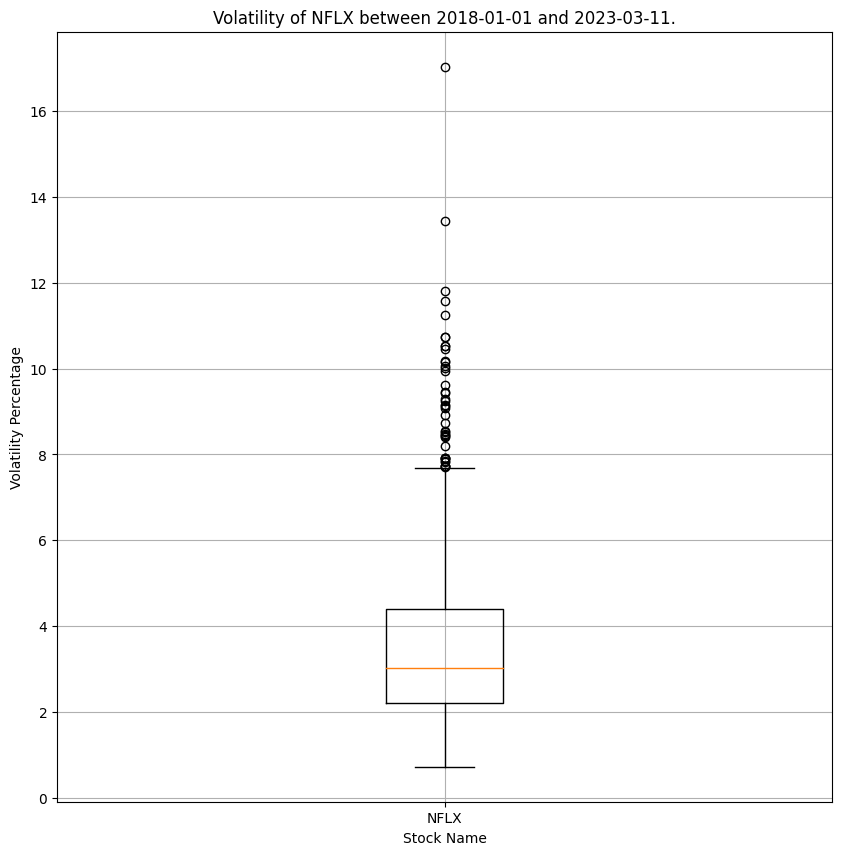

there was an average return of 3.5918248697760204% in this timeframe


In [22]:
#FINAL OUTPUT!!!!!!
# make box plot
plt.figure(figsize=(10, 10))
plt.boxplot(selected_stock_df['Volatility'])
plt.xticks([1], [stock_to_graph])
plt.xlabel('Stock Name')
plt.ylabel('Volatility Percentage')
plt.title('Volatility of {} between {} and {}.'.format(stock_to_graph, start_time.date(), end_time.date()))
plt.grid(True)
plt.show()
#Print ROI percentage last
print(f"there was an average return of {Average_return_final} in this timeframe")